##内容索引
1. 随机数 --- 二项分布binomial
2. 超几何分布 --- hypergeometric
3. 连续分布 --- normal、lognormal函数

In [12]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import show, plot
import matplotlib.pyplot as plt

##1. 随机数
随机数在蒙特卡罗方法(Monto Carlo method)、随机积分等很多方面都有应用。真随机数的产生很困难，因此在实际应用中我们通常使用伪随机数。

有关随机数的函数可以在NumPy的random模块中找到。随机数发生器的核心算法是基于马特赛特旋转演算法(Mersenne Twister algorithm)。随机数可以从离散分布或连续分布中产生。

**分布函数有一个可选的参数size，用于指定需要产生的随机数的数量。该参数允许设置为一个整数或元组，生成的随机数将填满指定形状的数组。**支持的离散分布包括几何分布、超几何分布和二项分布等。

###硬币赌博游戏
二项分布是n个独立重复的是非试验中成功次数的离散概率分布，这些概率是固定不变的，与试验结果无关。

- 现在对一个硬币赌博游戏下8份赌注
- 在硬币赌博游戏中，每一轮抛9枚硬币，如果少于5枚硬币正面朝上，你将损失8份赌注中的1份；否则，你将赢得1份赌注
- 初始资本为1000份赌注

In [2]:
# 初始化一个全0的数组来存放剩余资本
# 以参数10000调用binomial函数，进行10000轮硬币赌博游戏
cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))

In [3]:
# 模拟每一轮抛硬币的结果，更新cash数组
# 打印出outcome的最大最小值，检查输出中是否有异常
for i in xrange(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i-1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i-1] + 1
    else:
        raise AssertionError("Unexpected outcome" + outcome)

print outcome.min(), outcome.max()

0 9


<function matplotlib.pyplot.show>

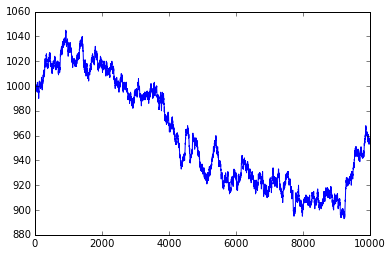

In [4]:
plot(np.arange(len(cash)), cash)
show

##2. 超几何分布
超几何分布（hypergeometric distribution）是一种离散概率分布，它描述的是一个罐子有两种物件，无放回地从中抽取指定数量的物件后，抽出指定种类物件的数量。

NumPy的random模块中的hypergeometric函数可以模拟这种分布。

###模拟游戏秀节目
游戏规则：
- 每当参赛者回答对一个问题，他们可以从一个罐子里摸出3个球并放回
- 罐子里有一个“倒霉球”，一旦摸到这个球，参赛者会被扣去6分
- 如果摸出3个球全部来自其余的25个普通球，可以得1分
- 100道问题被正确回答，其得分情况如何？

In [9]:
points = np.zeros(100)
# 第一个参数是罐中普通球的个数
# 第二个参数是倒霉球的个数
# 第三个参数是每次摸球的个数（采样数）
outcomes = np.random.hypergeometric(25, 1, 3, size=len(points))

In [10]:
for i in xrange(len(points)):
    if outcomes[i] == 3:
        points[i] = points[i-1] + 1
    elif outcomes[i] == 2:
        points[i] = points[i-1] - 6
    else:
        print outcomes[i]

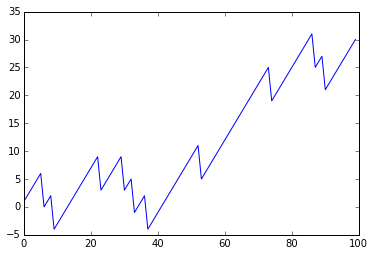

In [11]:
plot(points)
show()

##3. 连续分布
连续分布可以用概率密度函数(Probability Density Function, PDF)来描述。**随机变量落在某一区间内的概率等于概率密度函数在该区间的曲线下方的面积。**

NumPy的random模块中有一系列连续分布的函数——beta、chisquare、exponential、f、gamma、gumbel、laplace、lognormal、logistic、multivariate_normal、nonchetral_chisquare、noncentral_f、normal等。

###3.1 绘制正态分布

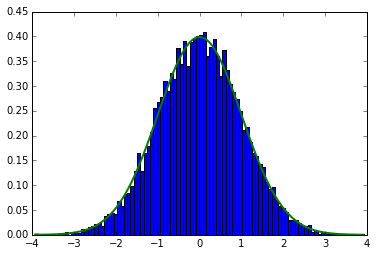

In [17]:
# 产生指定数量的随机数
N = 10000
normal_values = np.random.normal(size=N)

# 绘制分布直方图
dummy, bins, dummy = plt.hist(normal_values, np.sqrt(N), normed=True, lw=1)
sigma = 1
mu = 0
plot(bins, 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(bins-mu)**2 / (2*sigma**2)), lw=2)
show()

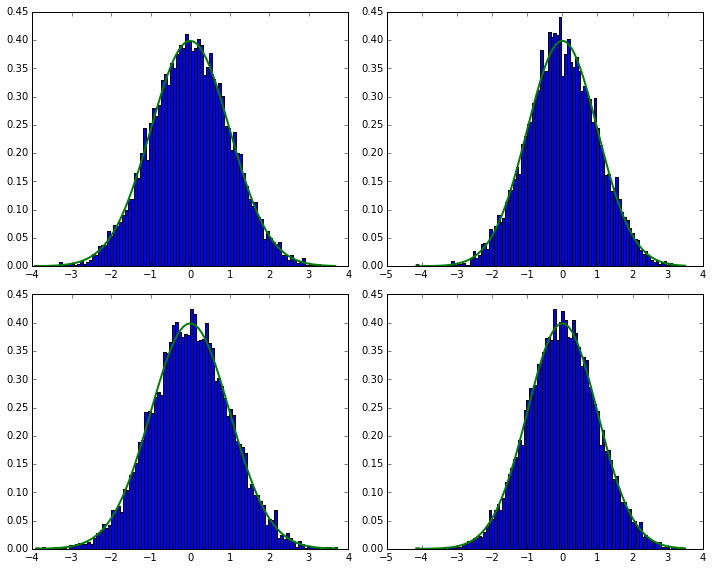

In [24]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
ax = []

N = 10000
sigma = 1
mu = 0

for a in xrange(2):
    for b in xrange(2):
        ax.append(fig.add_subplot(gs[a,b]))
        normal_values = np.random.normal(size=N)
        dummy, bins, dummy = plt.hist(normal_values, np.sqrt(N), normed=True, lw=1)
        ax[-1].plot(bins, 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(bins-mu)**2 / (2*sigma**2)), lw=2)

# 使得子图适应figure的间距
fig.tight_layout()
show()

###3.2 对数正态分布
对数正态分布(lognormal distribution)是自然对数服从正态分布的任意随机变量的概率分布。

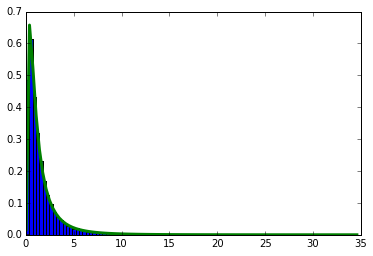

In [25]:
N = 10000
lognormal_values = np.random.lognormal(size=N)

dummy, bins, dummy = plt.hist(lognormal_values, np.sqrt(N), normed=True, lw=1)
sigma = 1
mu = 0

x = np.linspace(min(bins), max(bins), len(bins))
pdf = np.exp(-(np.log(x)-mu)**2 / (2*sigma**2)) / (x*sigma*np.sqrt(2*np.pi))
plot(x, pdf, lw=3)
show()